# Ejercico computacional #1

In [1]:
# Importar libreria de números aleatorios y ploteo. También se podría usar el módulo random de NumPy. 
from random import random, seed
import math
from matplotlib import pyplot as plt

# Para repetibilidad, se fija la seed. Comentar en caso de buscar aleatoriedad lo más completa posible.
seed(1337)


In [2]:
def binomial(n, k, p):
    """Distribución de probabilidad binomial."""
    return math.comb(n, k) * (p**k) * (1-p)**(n-k)

def poisson(n, k, p):
    """Distribución de probabilidad del proceso de Poisson (discretizado usando n y p)."""
    mu = n*p
    return  math.exp(-mu) * (mu**k) / math.factorial(k)

## Punto 1

Se quiere evaluar el correcto funcionamiento de la generación de números aleatorios en Python usando la librería estándar random. Para ello, se verificará que la proporción de números aleatorios generados uniformemente en \[0, 1) que son menores a p es cercana a p cuando el número total de números simulados es grande. Esto tiene un propósito especial: de funcionar correctamente, se puede obtener una variable aleatoria binaria análoga a una moneda cargada con probabilidad p. Basta con fijarse si un número aleatorio como los anteriores resulta mayor o menor a p.

In [3]:
def verificar_probabilidad(p=0.5, medidas=10000):
    """
    Devuelve la cantidad de veces que un número aleatorio
    entre 0 y 1 resultó menor a p sobre el total de intentos.
    """
    cuenta = 0
    for i in range(medidas):
        if random() < p:
            cuenta += 1
    return cuenta/medidas

In [4]:
p = random()
ratio = verificar_probabilidad(p)
print('Valor de p:', p, 'Proporción:', ratio, 'Diferencia:', p - ratio)

Valor de p: 0.6177528569514706 Proporción: 0.6166 Diferencia: 0.0011528569514706044


Por más grande que sea la muestra, no deja de ser un suceso puntual. Qué pasa si calculamos el error promedio de la estimación con respecto a la probabilidad?

In [5]:
tiradas = 1000
error = 0
for i in range(tiradas):
    p = random()
    ratio = verificar_probabilidad(p)
    error += p - ratio

print('Error promedio:', error/tiradas)

Error promedio: 7.724380277169296e-05


Cómo evoluciona el error con la cantidad de tiradas simuladas? Esta vez fijamos p.

In [6]:
simulaciones = {}

for i in range(9):
    simulaciones[i] = []

MAX_TIRADAS = 10000
p = random()

numero_de_tiradas = []
for i in range(int(MAX_TIRADAS / 10 - 1)):
    for j in range(9):
        ratio = verificar_probabilidad(p, (i+1)*10)
        simulaciones[j].append(ratio-p)
    numero_de_tiradas.append((i+1)*10)

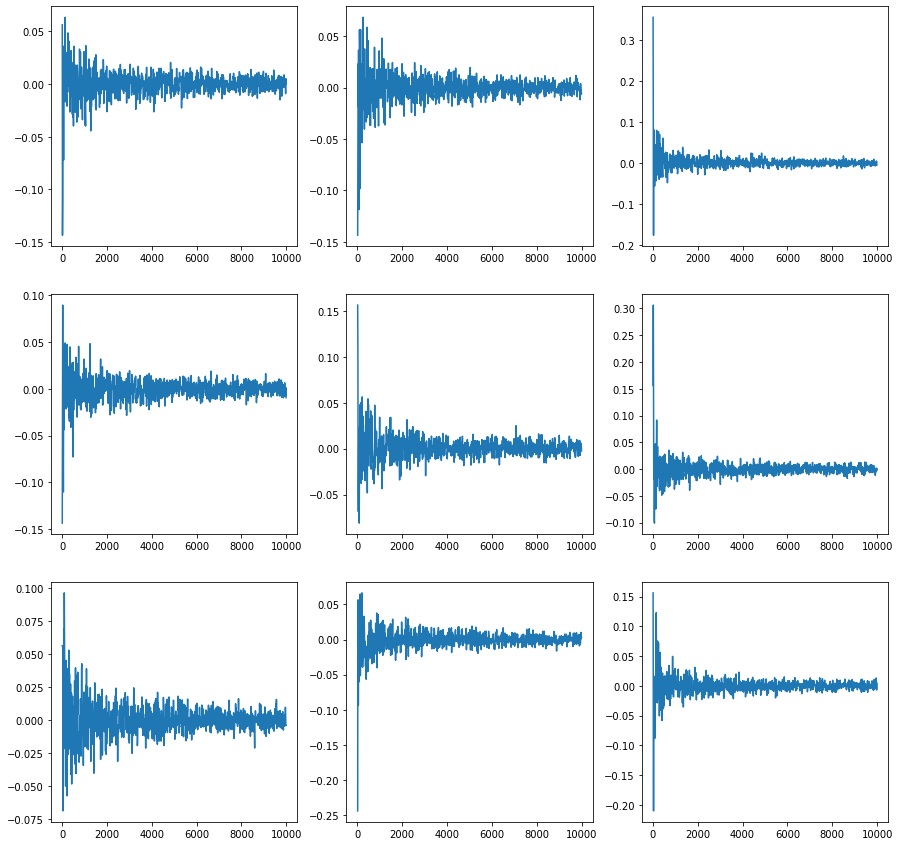

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))

for k in range(9):
    i = k % 3
    j = k // 3
    axs[i, j].plot(numero_de_tiradas, simulaciones[k])

Y el error cuadrático y el promedio?

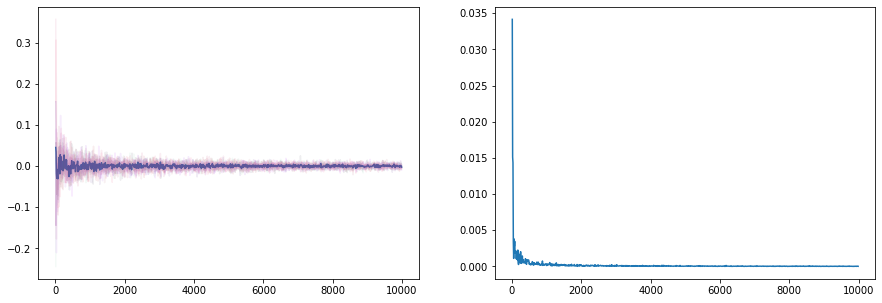

In [8]:
promedio = []
cuadrados = []
for i in range(len(numero_de_tiradas)):
    p = 0
    c = 0
    for j in range(9):
        p += simulaciones[j][i]
        c += simulaciones[j][i]**2
    p /= 9
    c /= 9
    promedio.append(p)
    cuadrados.append(c)
    
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(numero_de_tiradas, promedio)
for i in range(9):
    axs[0].plot(numero_de_tiradas, simulaciones[i], color=[random(), random(), random(), 0.08])
axs[1].plot(numero_de_tiradas, cuadrados)

In [9]:
def bernoulli(p=0.5):
    """
    Simula un experimento de Bernoulli con probabilidad p.
    Devuelve 1 si fue exitoso, de lo contrario 0.
    """
    assert p >= 0, "La probabilidad p tiene que ser mayor a 0."
    assert p <= 1, "La probabilidad p tiene que ser menor a 1."
    evento = random()
    return 1 if evento < p else 0

In [10]:
def n_bernoulli(n=1000, p=0.5):
    """
    Simula una sucesión de n experimentos de Bernoulli.
    Devuelve la cantidad de sucesos.
    """
    cuenta = 0
    for i in range(n):
        cuenta += bernoulli(p)
    return cuenta

## Punto 2

In [11]:
EFICIENCIA_DETECTOR = 0.75
FOTONES_INCIDENTES = 15

def experimento(cantidad=FOTONES_INCIDENTES, eficiencia=EFICIENCIA_DETECTOR):
    """
    Simula un experimento que cuenta la cantidad de fotones detectados por un detector
    en función de la cantidad de fotones incidentes y la eficiencia del detector.
    """
    return n_bernoulli(cantidad, eficiencia)

In [12]:
NUMERO_DE_EXPERIMENTOS = 1000

detecciones_controladas = []
for i in range(NUMERO_DE_EXPERIMENTOS):
    detecciones_controladas.append(experimento())

In [13]:
EVENTOS_MAX = 16 # Máxima cantidad de eventos cuya probabilidad se computa teóricamente

eventos = []
probabilidades = []
for i in range(EVENTOS_MAX):
    eventos.append(i + 0.5) # Para centrar las barras
    probabilidades.append(binomial(FOTONES_INCIDENTES, i, EFICIENCIA_DETECTOR))

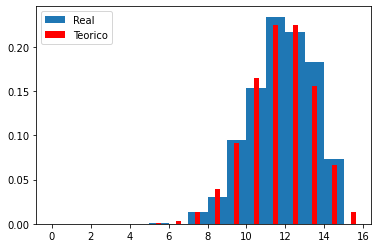

In [14]:
plt.hist(detecciones_controladas, bins=range(FOTONES_INCIDENTES + 1), density=True, label='Real')
plt.bar(eventos, probabilidades, color='red', width=0.25, label='Teorico')
plt.legend()
plt.show()

## Punto 3

La emisión de fotones con frecuencia F en un determinado tiempo t es un proceso de Poisson. Puede modelarse por una sucesión de n experimentos de Bernoulli con probabilidad F.dt cuando el tiempo de cada experimento dt se toma pequeño comparado a la inversa de la frecuencia de emisión 1/F.

In [15]:
FRECUENCIA_DE_EMISION = 15
INTERVALO = 1
DIVISIONES = 1000

def emision_binaria(dt=1, frecuencia=1):
    """
    Simula la emisión puntual de un fotón en un determinado intervalo
    dada su frecuencia de emisión.
    """
    return bernoulli(dt*frecuencia)

def emisiones_totales(intervalo=INTERVALO, divisiones=DIVISIONES, frecuencia=FRECUENCIA_DE_EMISION):
    """
    Simula la cantidad total de fotones emitidos por una fuente con
    cierta frecuencia y durante un cierto tiempo. Devuelve la cantidad
    de fotones emitidos.
    """
    cuenta = 0
    for i in range(divisiones):
        cuenta += emision_binaria(dt=intervalo/divisiones, frecuencia=frecuencia)
    return cuenta

In [16]:
NUMERO_DE_EXPERIMENTOS = 1000

emisiones = []
for i in range(NUMERO_DE_EXPERIMENTOS):
    emisiones.append(emisiones_totales())

In [17]:
EVENTOS_MAX = 35 # Máxima cantidad de eventos cuya probabilidad se computa teóricamente

eventos = []
probabilidades = []
for i in range(EVENTOS_MAX):
    eventos.append(i + 0.5) # Para centrar las barras
    probabilidades.append(poisson(DIVISIONES, i, FRECUENCIA_DE_EMISION*INTERVALO/DIVISIONES))

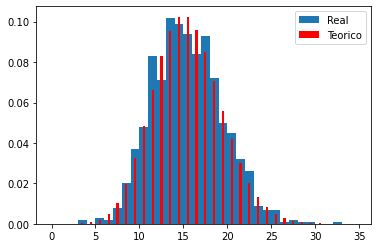

In [18]:
plt.hist(emisiones, bins=range(EVENTOS_MAX), density=True, label='Real')
plt.bar(eventos, probabilidades, color='red', width=0.25, label='Teorico')
plt.legend()
plt.show()

## Punto 4

In [19]:
def detecciones_totales(
    intervalo=INTERVALO,
    divisiones=DIVISIONES,
    frecuencia=FRECUENCIA_DE_EMISION,
    eficiencia=EFICIENCIA_DETECTOR
):
    """
    Simula la cantidad de fotones detectados por un detector en un cierto período de tiempo.
    Simula primero la cantidad de fotones emitidos y luego siula una sucesión de experimentos
    de Bernoulli con los mismos.
    """
    cuenta = 0
    for i in range(divisiones):
        cuenta += emision_binaria(dt=intervalo/divisiones, frecuencia=frecuencia)
    return n_bernoulli(cuenta, EFICIENCIA_DETECTOR)

In [20]:
NUMERO_DE_EXPERIMENTOS = 1000

detecciones = []
for i in range(NUMERO_DE_EXPERIMENTOS):
    detecciones.append(detecciones_totales())

In [21]:
EVENTOS_MAX = 35 # Máxima cantidad de eventos cuya probabilidad se computa teóricamente

eventos = []
probabilidades = []
for i in range(EVENTOS_MAX):
    eventos.append(i + 0.5) # Para centrar las barras
    probabilidades.append(poisson(DIVISIONES, i, EFICIENCIA_DETECTOR*FRECUENCIA_DE_EMISION*INTERVALO/DIVISIONES))

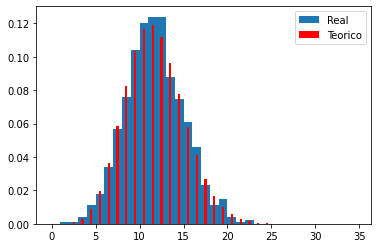

In [22]:
plt.hist(detecciones, bins=range(EVENTOS_MAX), density=True, label='Real')
plt.bar(eventos, probabilidades, color='red', width=0.25, label='Teorico')
plt.legend()
plt.show()

## Punto 5

Un proceso de Poisson es el límite de una sucesión extremadamente grande de procesos de Bernoulli. En el caso del punto 3, el proceso era la emisión o no de un fotón en un corto intervalo de tiempo. Ahora bien, el proceso del punto 4 estudia la cantidad de fotones detectados, no emitidos, para lo cual contempla la probabilidad de que un fotón sea emitido pero no detectado. Asumiendo la inexistencia de falsos positivos (no están mencionados en el enunciado), la detección de un fotón es en sí un proceso de Bernoulli, de menor probabilidad que el anterior. El nuevo proceso tiene una probabilidad de éxito igual a la multiplicación de la probabilidad de emisión por la eficiencia del detector. En efecto:<br/>
P(detectar) = P(detectar | emitio)P(emitio) + P(detectar | no emitió)P(no emitió)=Eficiencia * P(emitir) <br/>
Un ejemplo fácil ayuda a entender que la conjunción de procesos de Bernoulli es uno nuevo. Elegir correctamente en cuál de dos manos cerradas se encuentra un dado es un proceso con p=0.5. Tirar un dado y que salga 4 es un proceso con p=1/6. Elegir correctamente la mano y luego tirar el dado y que salga un 4 es un proceso con p=1/12.

In [23]:
def emision_efectiva(dt=1, frecuencia=1, eficiencia=1):
    """Simula la emisión efectiva de un fotón dada por su emisión y posterior detección."""   
    return bernoulli(dt*frecuencia*eficiencia)

def emisiones_efectivas_totales(
    intervalo=INTERVALO,
    divisiones=DIVISIONES,
    frecuencia=FRECUENCIA_DE_EMISION,
    eficiencia=EFICIENCIA_DETECTOR
):
    """
    Simula las emisiones totales efectivas de una fuente de fotones, es decir las detectadas por un detector
    con eficiencia imperfecta. Para ello, considera un único proceso de Poisson a partir de un experimento
    de Bernoulli modificado que incluye la probabilidad de detección. Devuelve la cantidad de fotones.
    """
    cuenta = 0
    for i in range(divisiones):
        cuenta += emision_efectiva(dt=intervalo/divisiones, frecuencia=frecuencia, eficiencia=eficiencia)
    return cuenta

In [24]:
NUMERO_DE_EXPERIMENTOS = 1000

emisiones_efectivas = []
for i in range(NUMERO_DE_EXPERIMENTOS):
    emisiones_efectivas.append(emisiones_efectivas_totales())

In [25]:
EVENTOS_MAX = 35 # Máxima cantidad de eventos cuya probabilidad se computa teóricamente

eventos = []
probabilidades = []
for i in range(EVENTOS_MAX):
    eventos.append(i + 0.5) # Para centrar las barras
    probabilidades.append(poisson(DIVISIONES, i, EFICIENCIA_DETECTOR*FRECUENCIA_DE_EMISION*INTERVALO/DIVISIONES))

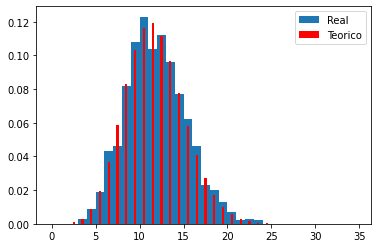

In [26]:
plt.hist(emisiones_efectivas, bins=range(EVENTOS_MAX), density=True, label='Real')
plt.bar(eventos, probabilidades, color='red', width=0.25, label='Teorico')
plt.legend()
plt.show()